In [10]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
G = nx.Graph()

In [12]:
G = nx.Graph(day="Friday")
G.graph
{'day': 'Friday'}

{'day': 'Friday'}

In [13]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
{'time': '5pm'}
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [14]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [15]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

[2]

In [16]:
positions=nx.spring_layout(G)

In [17]:
nx.draw(G,pos=positions)
nx.draw_networkx_labels(G,pos=positions)
plt.draw() 

In [18]:
coauthorshipG=nx.read_graphml("netScience.graphml")

In [19]:
positions=nx.spring_layout(coauthorshipG)

In [20]:
nx.draw(coauthorshipG,pos=positions)
nx.draw_networkx_labels(coauthorshipG,pos=positions)
plt.draw() 

In [21]:
k = list(nx.connected_components(coauthorshipG))

In [22]:
dict(enumerate(k))

{0: {'0.0', '1.0', '1084.0', '946.0'},
 1: {'2.0', '3.0', '4.0', '5.0', '6.0'},
 2: {'10.0', '11.0', '1424.0', '1425.0', '1532.0', '7.0', '8.0', '9.0'},
 3: {'1047.0', '1048.0', '1049.0', '1050.0', '12.0', '13.0', '14.0', '15.0'},
 4: {'16.0', '17.0', '18.0'},
 5: {'19.0'},
 6: {'20.0', '21.0', '22.0'},
 7: {'200.0', '201.0', '202.0', '23.0', '24.0', '25.0', '369.0'},
 8: {'26.0'},
 9: {'27.0', '28.0', '29.0'},
 10: {'100.0',
  '1005.0',
  '1008.0',
  '1021.0',
  '1022.0',
  '1023.0',
  '1024.0',
  '1025.0',
  '1026.0',
  '1027.0',
  '1030.0',
  '1039.0',
  '1040.0',
  '1041.0',
  '1081.0',
  '1082.0',
  '1083.0',
  '1086.0',
  '1087.0',
  '1088.0',
  '1089.0',
  '1091.0',
  '1092.0',
  '1121.0',
  '1122.0',
  '1123.0',
  '113.0',
  '1130.0',
  '1135.0',
  '1136.0',
  '1137.0',
  '1138.0',
  '114.0',
  '1145.0',
  '1162.0',
  '1163.0',
  '1172.0',
  '1177.0',
  '1178.0',
  '1180.0',
  '1181.0',
  '1182.0',
  '1189.0',
  '1190.0',
  '1191.0',
  '1195.0',
  '1196.0',
  '1197.0',
  '120.0

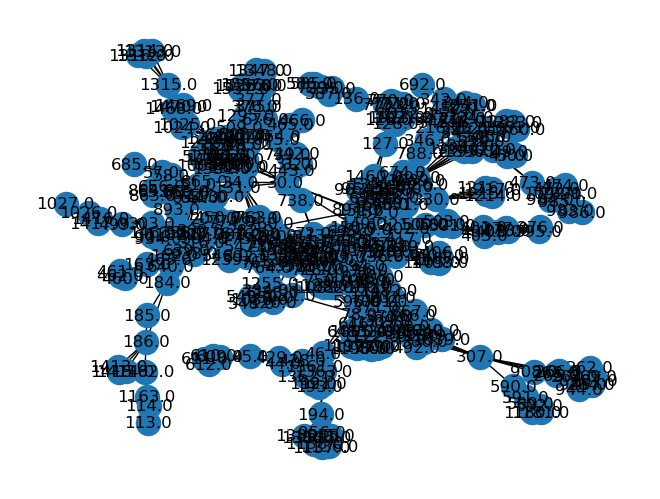

In [23]:
Gcc = sorted(nx.connected_components(coauthorshipG), key=len, reverse=True)
G0 = coauthorshipG.subgraph(Gcc[0])
positions=nx.spring_layout(G0)
nx.draw(G0,pos=positions)
nx.draw_networkx_labels(G0,pos=positions)
plt.draw()

In [25]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

coauthorshipSG = connected_component_subgraphs(coauthorshipG)

In [26]:
coauthorshipSG

<generator object connected_component_subgraphs at 0x0000023CB475EAC0>

In [27]:
coauthorshipSGL = max(coauthorshipSG, key = len)

In [29]:
coauthorshipSGL

In [30]:
positions = nx.spring_layout(coauthorshipSGL)

nx.draw(coauthorshipSGL, pos = positions)
nx.draw_networkx_labels(coauthorshipSGL, pos = positions)
plt.draw()

In [31]:
coauthorshipBC = nx.betweenness_centrality(coauthorshipG, k = None, normalized = True, weight = None, endpoints = False, seed = None)

max_key = max(coauthorshipBC, key = coauthorshipBC.get)
max_key

'78.0'

In [32]:
sub_graphs = list(connected_component_subgraphs(coauthorshipG))

In [33]:
len(sub_graphs)

396

In [34]:
coefficients = []
for i in sub_graphs:
    coef = nx.clustering(i)
    coefficients.append(coef)

In [35]:
len(coefficients)

396

In [36]:
average_coefficients = []

for i in coefficients:
    avg_coef = sum(i.values()) / len(i)
    average_coefficients.append(avg_coef)

In [37]:
len(average_coefficients)

396

In [38]:
average_coefficients[0:10]

[0.5833333333333333,
 1.0,
 0.5958333333333333,
 0.9285714285714286,
 1.0,
 0.0,
 1.0,
 0.7619047619047619,
 0.0,
 1.0]

In [39]:
sub_graphs[3]

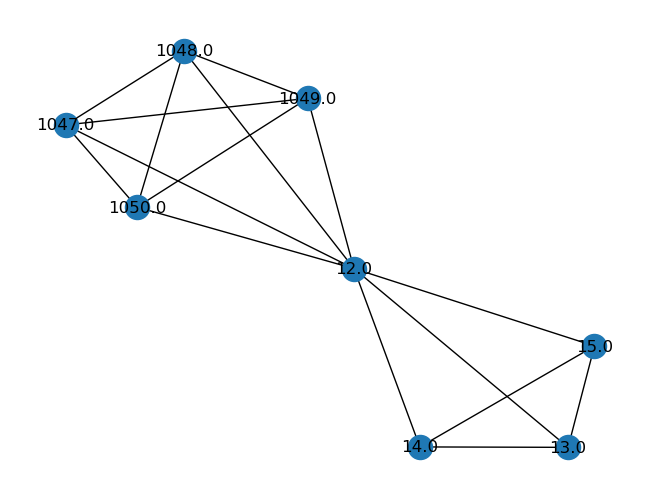

In [40]:
positions = nx.spring_layout(sub_graphs[3])

nx.draw(sub_graphs[3], pos = positions)
nx.draw_networkx_labels(sub_graphs[3], pos = positions)
plt.draw()

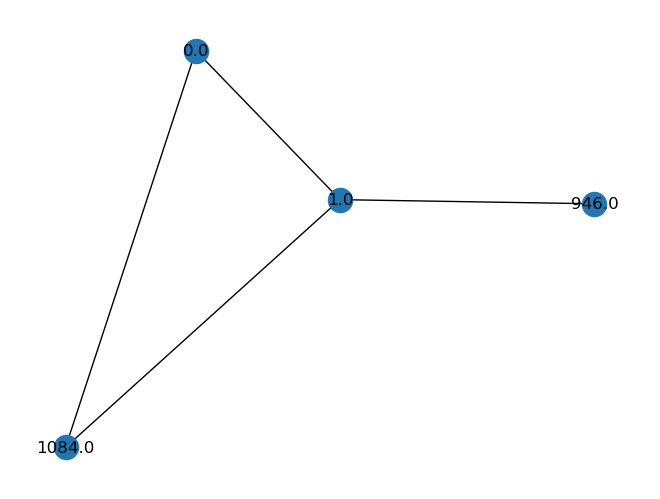

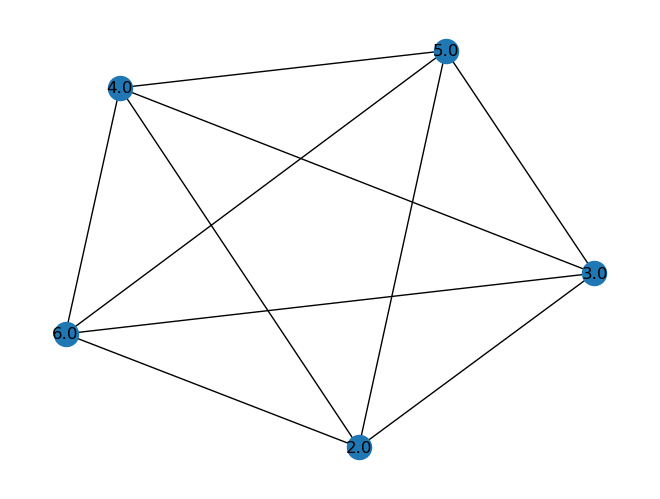

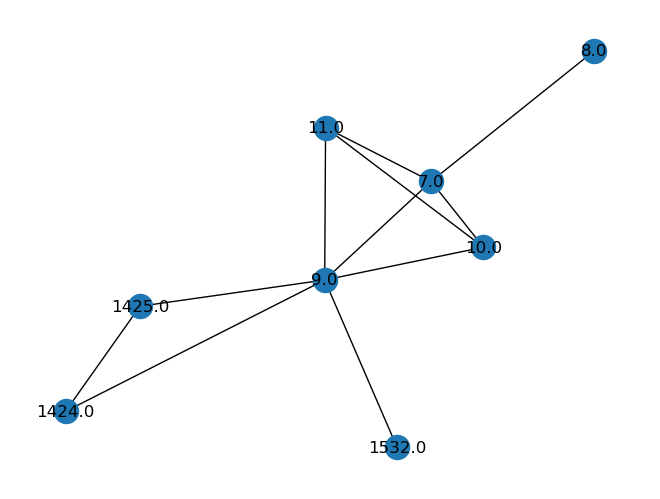

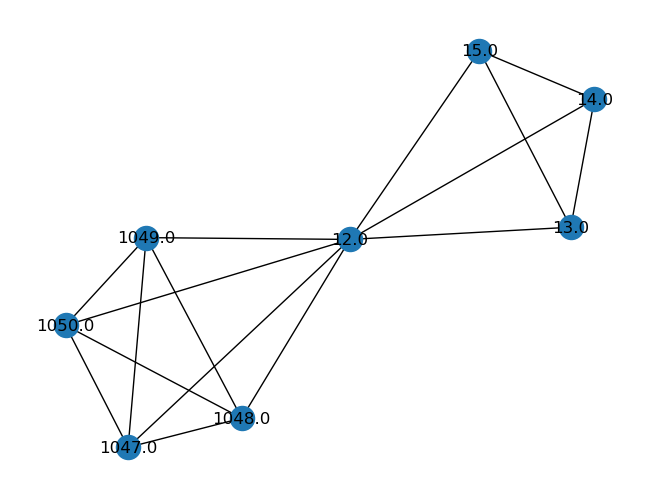

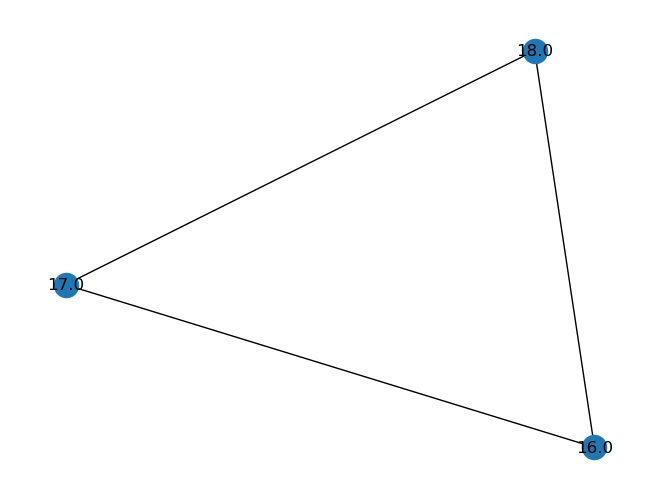

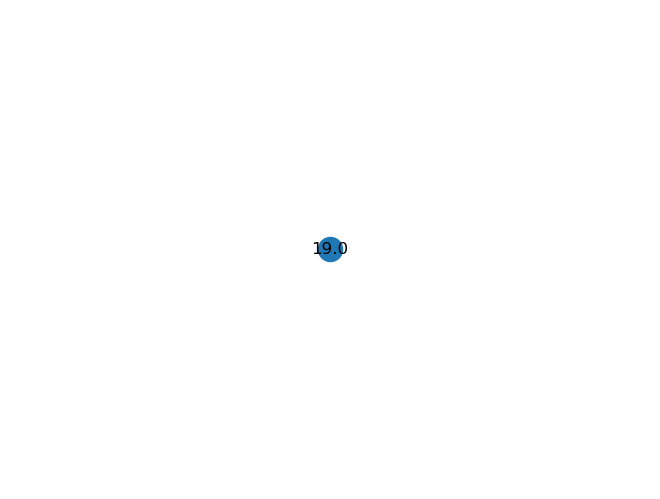

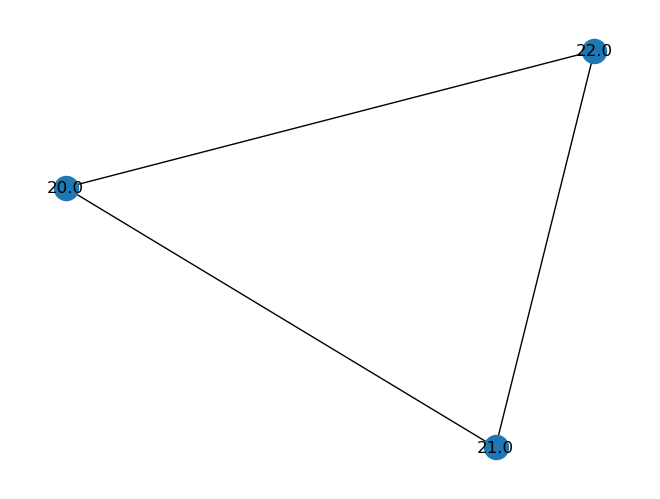

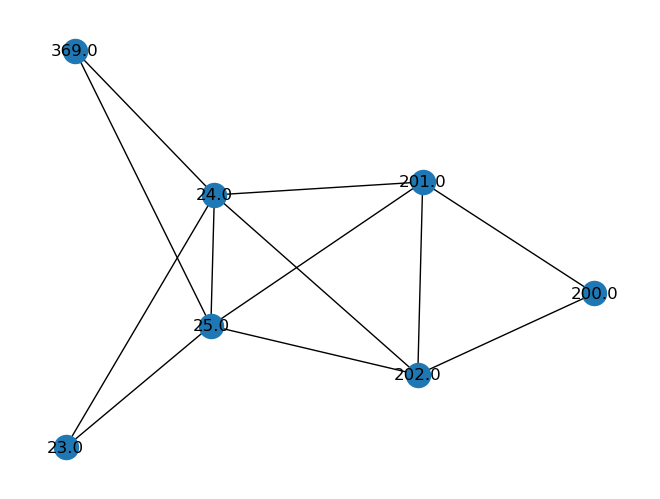

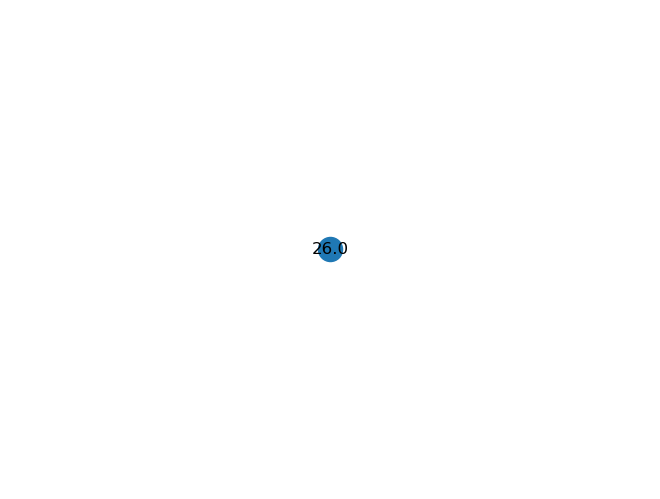

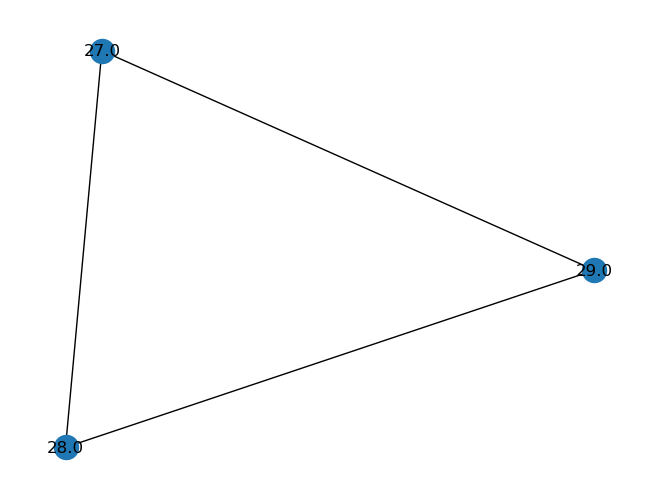

In [42]:
for i in sub_graphs[0:10]:
    positions = nx.spring_layout(i)
    nx.draw(i, pos = positions)
    nx.draw_networkx_labels(i, pos = positions)
    plt.draw()
    plt.show()

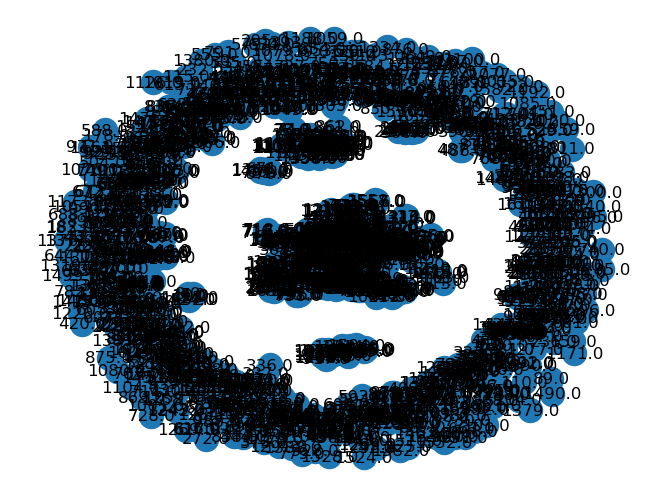

In [43]:
positions = nx.spring_layout(coauthorshipG)

nx.draw(coauthorshipG, pos = positions)
nx.draw_networkx_labels(coauthorshipG, pos = positions)
plt.draw() 

Exercuse 2

In [45]:
from urllib.request import urlopen
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = (stopwords.words('english'))

punctuations = '''!()-,[]{};:'”“"’`\,,<>./?@$%^&*_~'''

extra_words = ['I', 'The', 'one', 'He', 'It', 'said', '...', 'would']

target_url1 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url1).read().decode('utf-8')

word_tokens1 = word_tokenize(book_raw)

swr_word_tokens1 = [word for word in word_tokens1 if not word in stop_words]
eswr_word_tokens1 = [word for word in swr_word_tokens1 if not word in extra_words]
pswr_word_tokens1 = [word for word in eswr_word_tokens1 if not word in punctuations]

In [46]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters  = len(character_list)

In [47]:
character_map = {}
for i in range(numCharacters):
    character_map[i] = character_list[i]

In [48]:
character_map

{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Cravatte',
 5: 'Valjean',
 6: 'Gervais',
 7: 'Fantine',
 8: 'Tholomyès',
 9: 'Blachevelle',
 10: 'Dahlia',
 11: 'Fameuil',
 12: 'Favourite',
 13: 'Listolier',
 14: 'Zéphine',
 15: 'Cosette',
 16: 'Thénardier',
 17: 'Éponine',
 18: 'Azelma',
 19: 'Javert',
 20: 'Fauchelevent',
 21: 'Bamatabois',
 22: 'Champmathieu',
 23: 'Brevet',
 24: 'Simplice',
 25: 'Chenildieu',
 26: 'Cochepaille',
 27: 'Innocente',
 28: 'Reverend',
 29: 'Ascension',
 30: 'Crucifixion',
 31: 'Gavroche',
 32: 'Magnon',
 33: 'Gillenormand',
 34: 'Marius',
 35: 'Colonel',
 36: 'Mabeuf',
 37: 'Enjolras',
 38: 'Combeferre',
 39: 'Prouvaire',
 40: 'Feuilly',
 41: 'Courfeyrac',
 42: 'Bahorel',
 43: 'Lesgle',
 44: 'Joly',
 45: 'Grantaire',
 46: 'Patron-Minette',
 47: 'Brujon',
 48: 'Toussaint'}

In [49]:
k = 0;
numOccurrences = pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] = pswr_word_tokens1.count(character)
    k = k+1

In [50]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)  

In [51]:
numTokens = len(pswr_word_tokens1)

In [52]:
for j in range(numCharacters):
    positions_current   = []
    for i in range(numTokens):
        if pswr_word_tokens1[i] == character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:] = positions_current 

In [53]:
positions_characters[0]

array([ 2935.,  2978.,  3008.,  3042.,  3061.,  3119.,  3182.,  3202.,
        3216.,  3223.,  3227.,  3284.,  3417.,  3772.,  3790.,  3805.,
        3905.,  4261.,  4295.,  6082.,  6189.,  8511.,  8520., 10272.,
       12167., 12189., 12212., 36416.])

In [54]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters - 1):
    for j in range(i + 1,numCharacters):
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                if (dist < 500):
                    interactions_characters[i,j] = interactions_characters[i,j]+1
                    interactions_characters[j,i] = interactions_characters[j,i]+1

In [55]:
interactions_characters

array([[  0., 281.,  78., ...,   0.,   0.,   0.],
       [281.,   0., 372., ...,   0.,   0.,   3.],
       [ 78., 372.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   5.,   0.],
       [  0.,   0.,   0., ...,   5.,   0.,   4.],
       [  0.,   3.,   0., ...,   0.,   4.,   0.]])

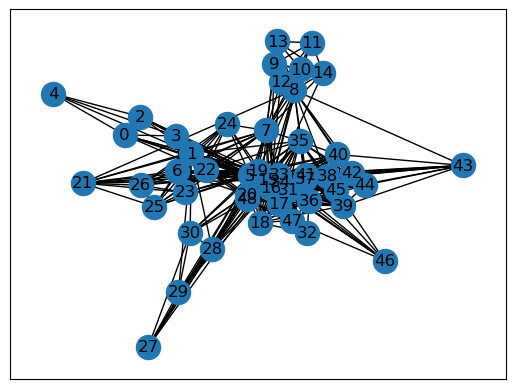

In [56]:
G1 = nx.from_numpy_matrix(interactions_characters) 
nx.draw_networkx(G1)

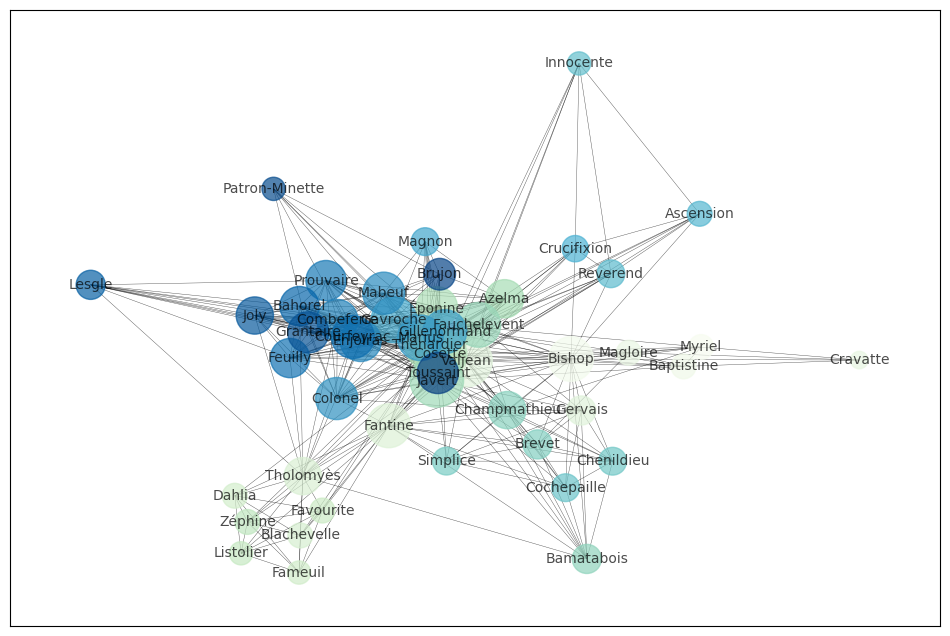

In [57]:
kdeg = G1.degree()
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H1 = nx.relabel_nodes(G1, character_map)

nx.draw_networkx(H1, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])


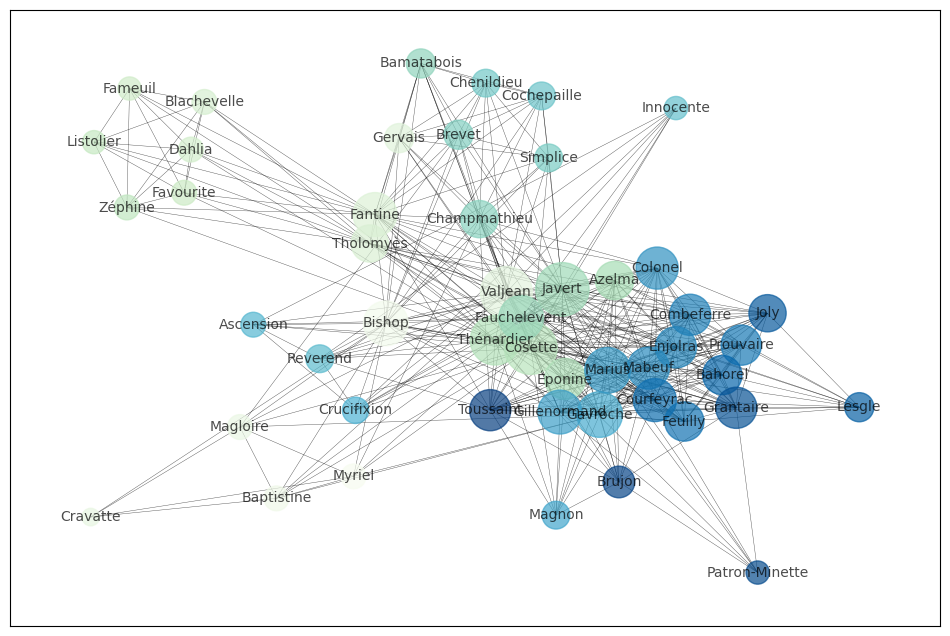

In [58]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H2 = nx.relabel_nodes(nx.from_numpy_matrix(np.log(1 + interactions_characters)), character_map)

nx.draw_networkx(H2, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])


In [59]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1, degree_centrality, 'dc')

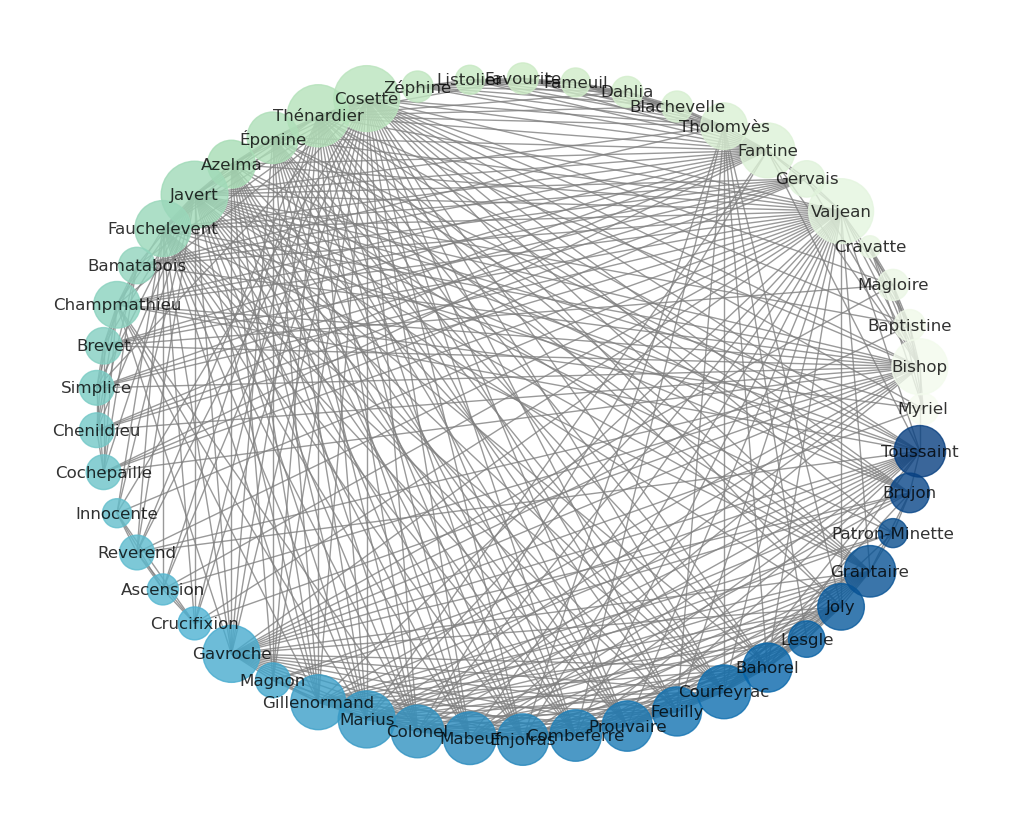

In [60]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
                 font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
                 node_size = [3000*v for v in degree_centrality.values()])

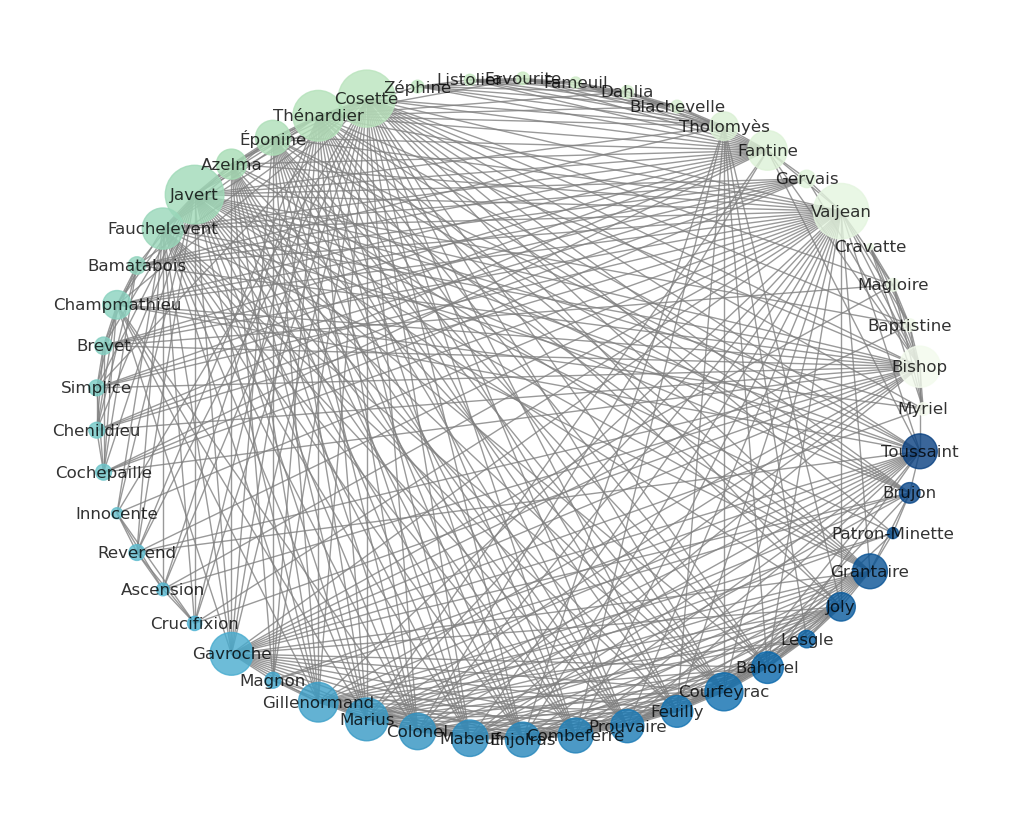

In [61]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
                 font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
                 node_size = [3000*(v**2) for v in degree_centrality.values()])

In [62]:
centralityValues = [v for v in degree_centrality.values()]

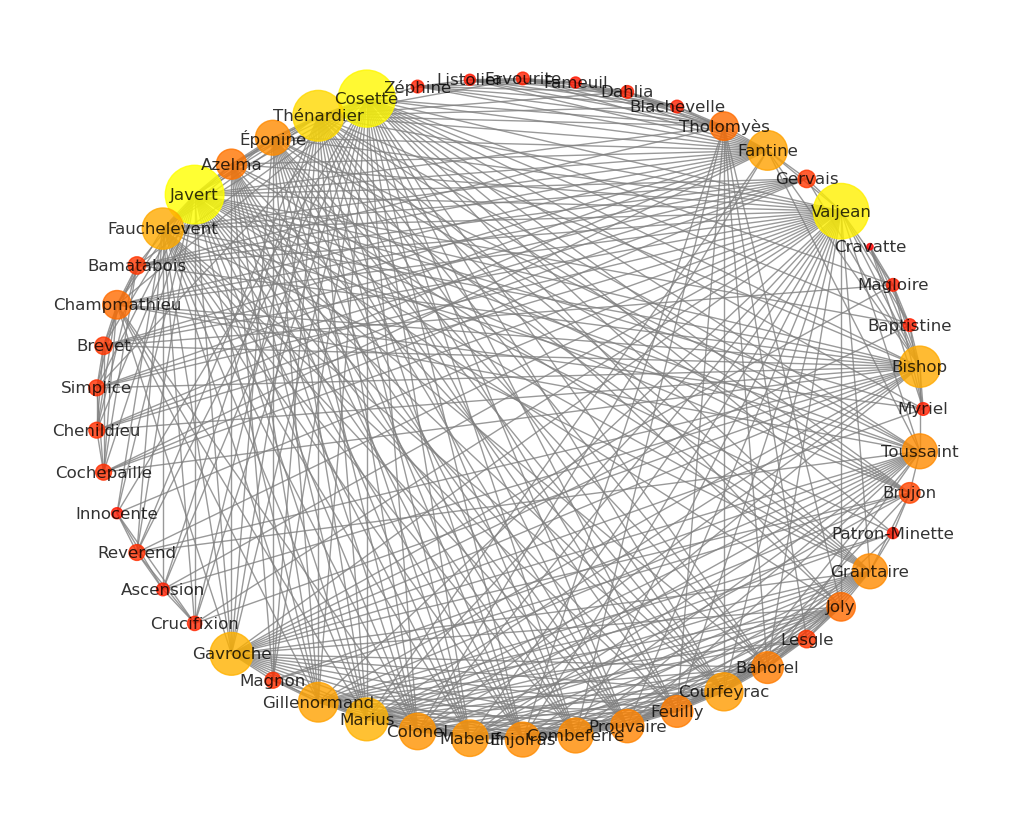

In [63]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color = centralityValues, font_color = 'black', alpha = 0.8, edge_color = 'gray', 
                 #edge_weight = 5,
                 font_size = 12, with_labels = True, cmap = plt.cm.autumn,
                 node_size = [3000*(v**2) for v in degree_centrality.values()])

In [64]:
cliques = list(nx.find_cliques(H1))
cl2 = list(cliques)
len(cl2)

44

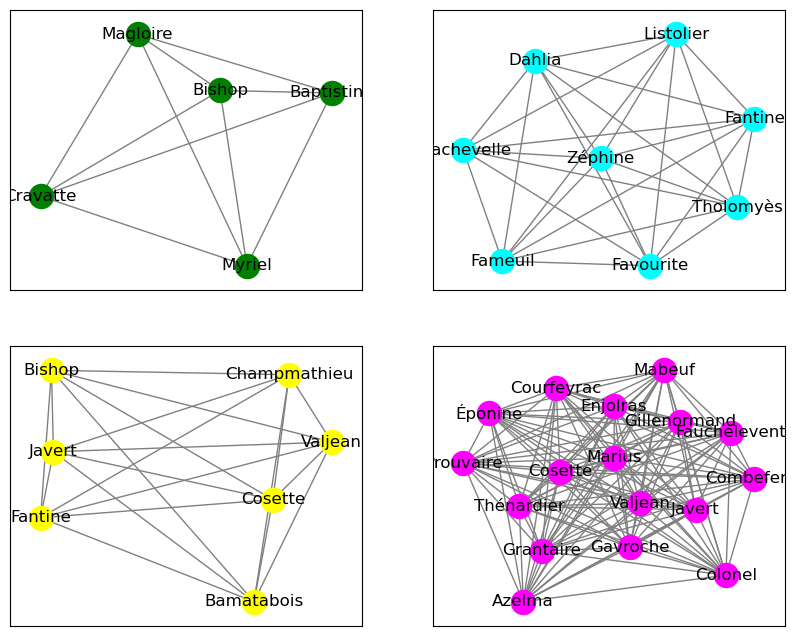

In [65]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[5]), font_size = 12, font_color = 'black', node_color = 'green', edge_color = 'gray')
ax1 = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[0]), font_size = 12, font_color = 'black', node_color = 'cyan', edge_color = 'gray')
ax1 = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[24]), font_size = 12, font_color = 'black', node_color = 'yellow', edge_color = 'gray')
ax1 = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[34]), font_size = 12, font_color = 'black', node_color = '#ff00ff', edge_color = 'gray')


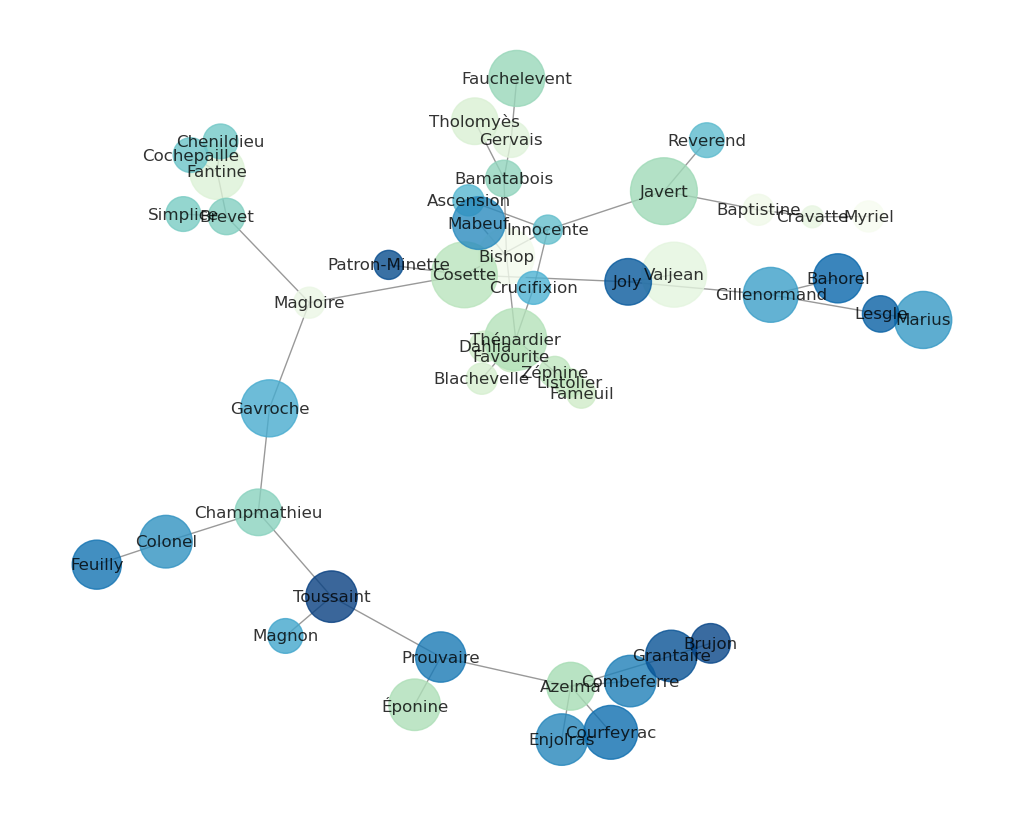

In [66]:
T = nx.minimum_spanning_tree(H1)
fig = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
               font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
               node_size = [3000*v for v in degree_centrality.values()])

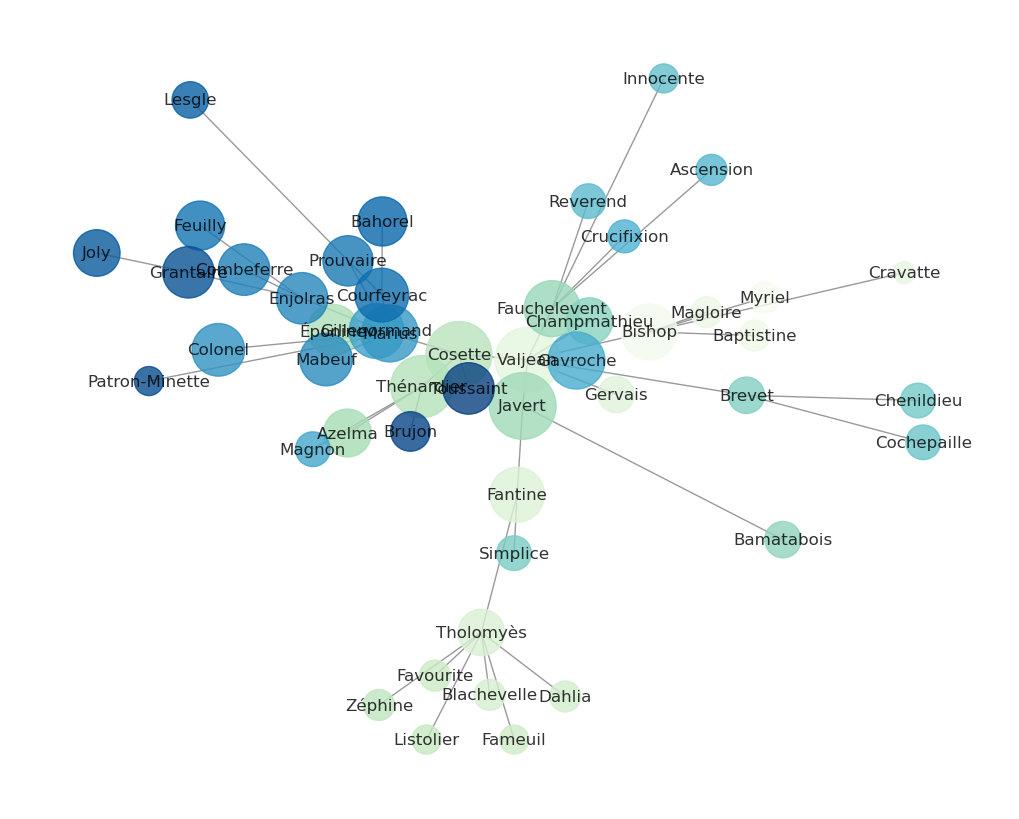

In [67]:
T = nx.maximum_spanning_tree(H1)
fig = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
               font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
               node_size = [3000*v for v in degree_centrality.values()])

In [68]:
import os
import urllib.request
import xml.etree.ElementTree as ET
feed = urllib.request.urlopen("http://feeds.bbci.co.uk/news/world/rss.xml?edition=uk")

In [70]:
feed

In [71]:
tree = ET.parse(feed)
root = tree.getroot()

In [125]:
print ("Root node is: ", root.tag, " with attributes: ", root.attrib)

Root node is:  rss  with attributes:  {'version': '2.0'}


In [126]:
#root

In [129]:
list(root[0])

[<Element 'title' at 0x0000023CB8A644A0>,
 <Element 'description' at 0x0000023CB8A64400>,
 <Element 'link' at 0x0000023CB8FC8950>,
 <Element 'image' at 0x0000023CB8FC89F0>,
 <Element 'generator' at 0x0000023CB8FC8BD0>,
 <Element 'lastBuildDate' at 0x0000023CB8FC8C20>,
 <Element 'copyright' at 0x0000023CB8FC8DB0>,
 <Element 'language' at 0x0000023CB8FC8F90>,
 <Element 'ttl' at 0x0000023CB8FC8E00>,
 <Element 'item' at 0x0000023CB8FC8E50>,
 <Element 'item' at 0x0000023CB8FD6270>,
 <Element 'item' at 0x0000023CB8FD64F0>,
 <Element 'item' at 0x0000023CB8FD6770>,
 <Element 'item' at 0x0000023CB8FD69F0>,
 <Element 'item' at 0x0000023CB8FD6C70>,
 <Element 'item' at 0x0000023CB8FD6EF0>,
 <Element 'item' at 0x0000023CB8FD71D0>,
 <Element 'item' at 0x0000023CB8FD7450>,
 <Element 'item' at 0x0000023CB8FD76D0>,
 <Element 'item' at 0x0000023CB8FD7950>,
 <Element 'item' at 0x0000023CB8FD7BD0>,
 <Element 'item' at 0x0000023CB8FD7E50>,
 <Element 'item' at 0x0000023CB8FDB130>,
 <Element 'item' at 0x0000

In [130]:
channelNode = root[0]

In [131]:
channelNode

<Element 'channel' at 0x0000023CB81060E0>

In [132]:
for itemNode in channelNode.iter('item'):
    dateText = itemNode.find('pubDate').text
    titleText = itemNode.find('title').text

In [133]:
totalList = {dateText, titleText}

In [134]:
list(totalList)

['Thu, 24 Nov 2022 23:11:08 GMT', 'Olena Zelenska: We will endure']